## Project Objective
To predict the occurance of diabetes using machine learning and the given [data](https://www.kaggle.com/datasets/mathchi/diabetes-data-set). By using the features provided we aim to train multiple machine learning model and select the best to use and deploy using pickle in a User Interface web app using Streamlit. The app takes input in simple drop down list and text fields, and on a single click predict if a patient is suffering from diabetes or not.

The following are the simple description of the feautures provided in the dataset:
|Feature |Description|
|--------|-----------|
|Pregnancies|Number of times pregnant|
|Glucose|Plasma glucose concentration a 2 hours in an oral glucose tolerance test|
|BloodPressure|Diastolic blood pressure (mm Hg)|
|SkinThickness|Triceps skin fold thickness (mm)|
|Insulin|2-Hour serum insulin (mu U/ml)|
|BMI|Body mass index (weight in kg/(height in m)^2)|
|DiabetesPedigreeFunction|Diabetes pedigree function|
|Age|Age (years)|
|Outcome|Class variable (0 or 1)|

**importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

**importing dataset**

In [2]:
df = pd.read_csv("diabetes.csv")

### Exploratory Data Analysis

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.shape

(768, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# Use IQR method to identify outliers for numerical features:
for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}: {outliers.shape[0]}")
    

Outliers in Pregnancies: 4
Outliers in Glucose: 5
Outliers in BloodPressure: 45
Outliers in SkinThickness: 1
Outliers in Insulin: 34
Outliers in BMI: 19
Outliers in DiabetesPedigreeFunction: 29
Outliers in Age: 9
Outliers in Outcome: 0


**1. Count Plot for Outcome:**

Shows the distribution of diabetic vs. non-diabetic patients.

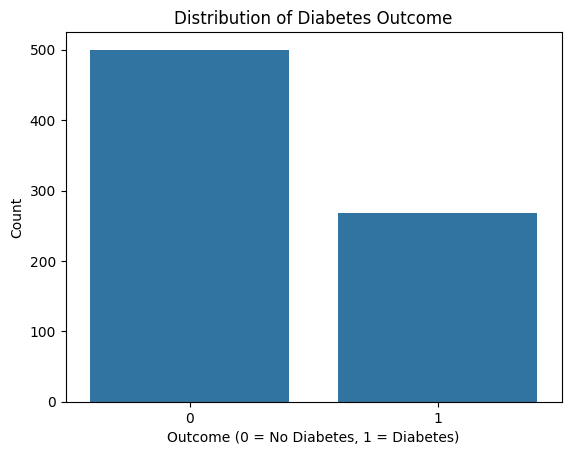

In [10]:
sns.countplot(data=df, x='Outcome')
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.savefig("Dist_of_diabetes.png")
plt.show()

**2. Histogram for Each Numerical Feature:**

To understand the distribution of each variable.

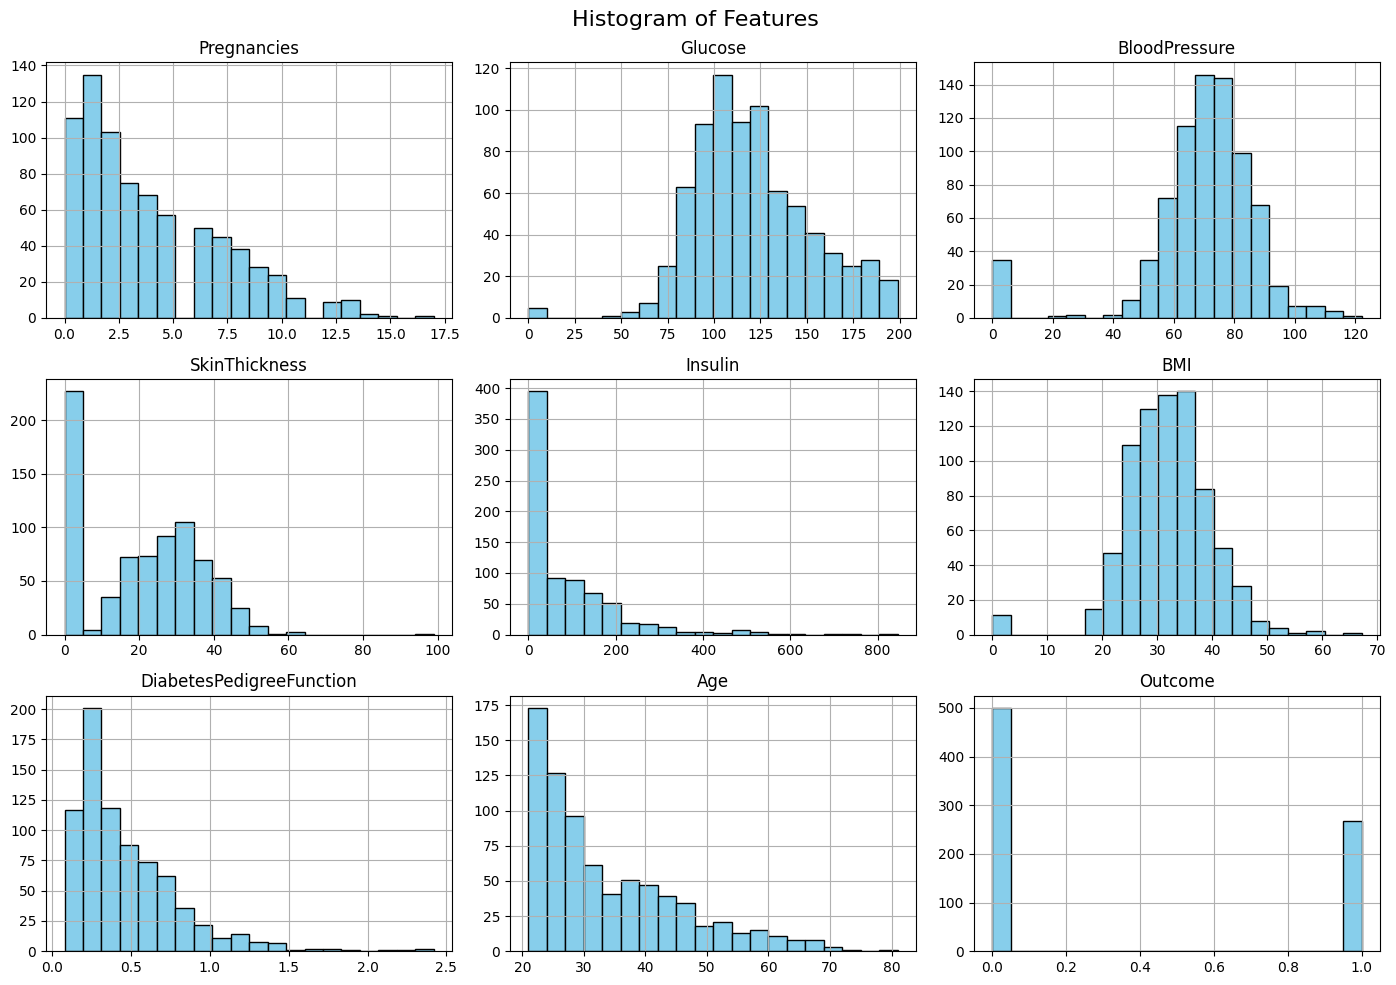

In [11]:
df.hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histogram of Features', fontsize=16)
plt.tight_layout()
plt.savefig("hist_all_num_feature.png")
plt.show()

**3. Box Plot by Outcome:**

To detect outliers and differences in distribution across diabetic and non-diabetic groups.

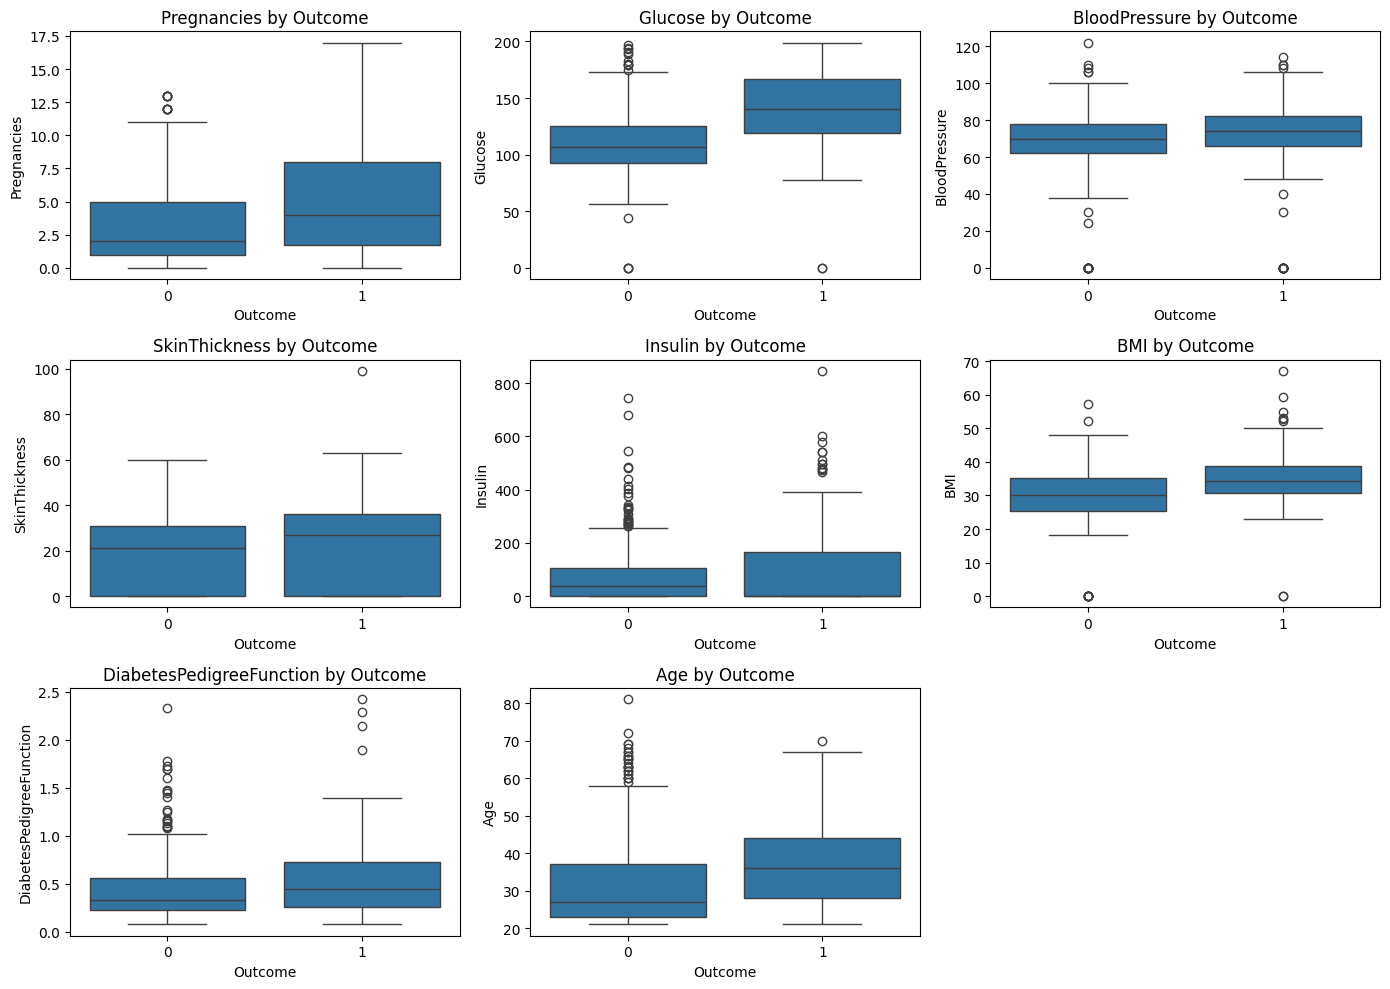

In [12]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='Outcome', y=column)
    plt.title(f'{column} by Outcome')
plt.tight_layout()
plt.savefig("boxplot.png")
plt.show()


**4. Pair Plot Colored by Outcome:**

Shows relationships between selected features.

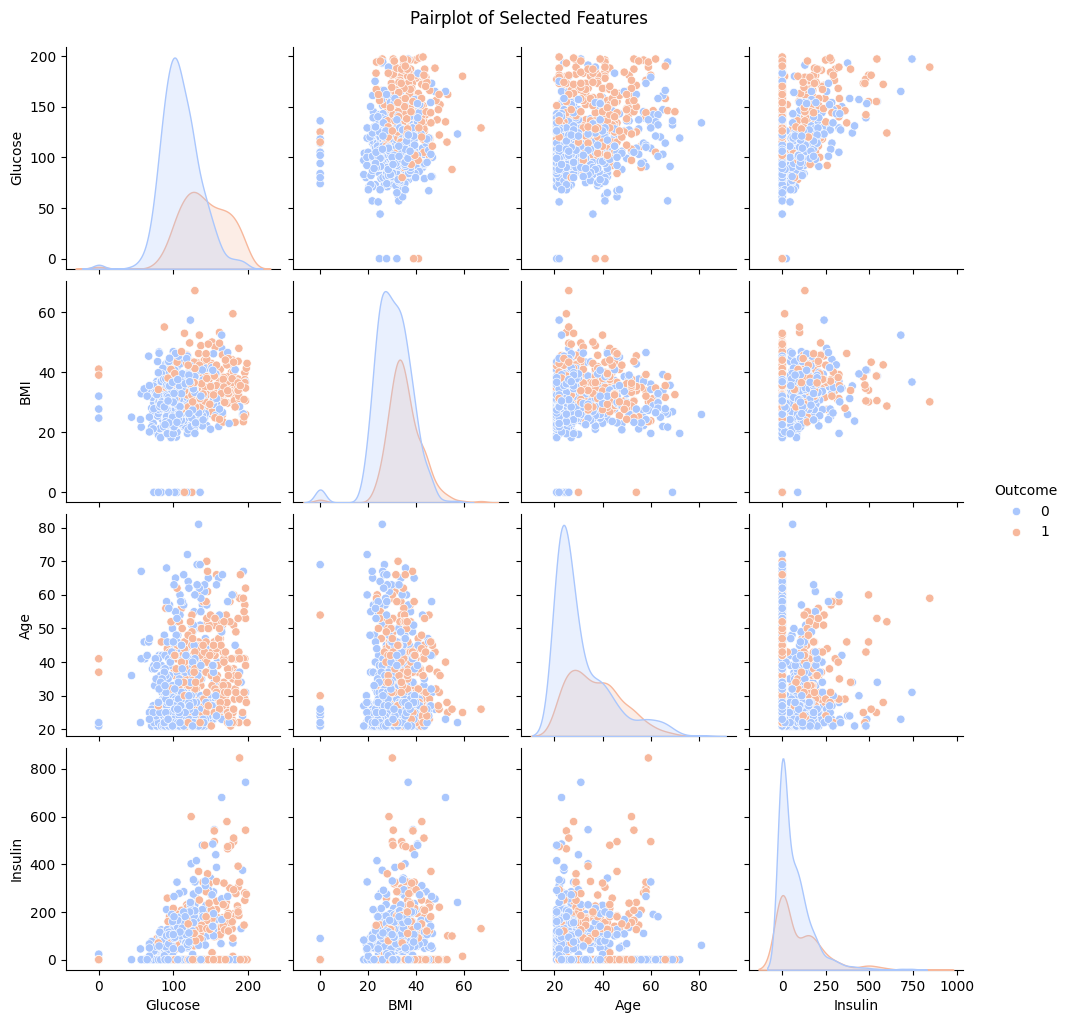

In [13]:
sns.pairplot(df[['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']], hue='Outcome', palette='coolwarm')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.savefig("pairplot.png")
plt.show()


**5. Heatmap of Feature Correlations:**

To identify highly correlated features.

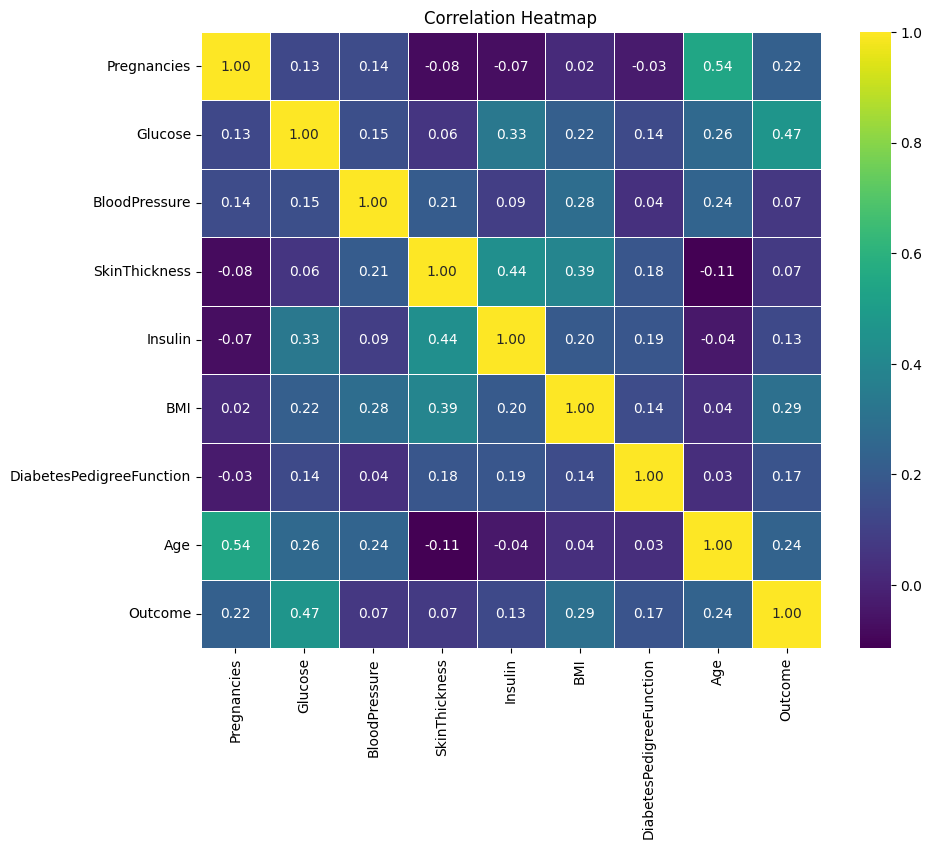

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**6. Violin Plots for Feature Distributions by Outcome:**

More detailed view than box plots.

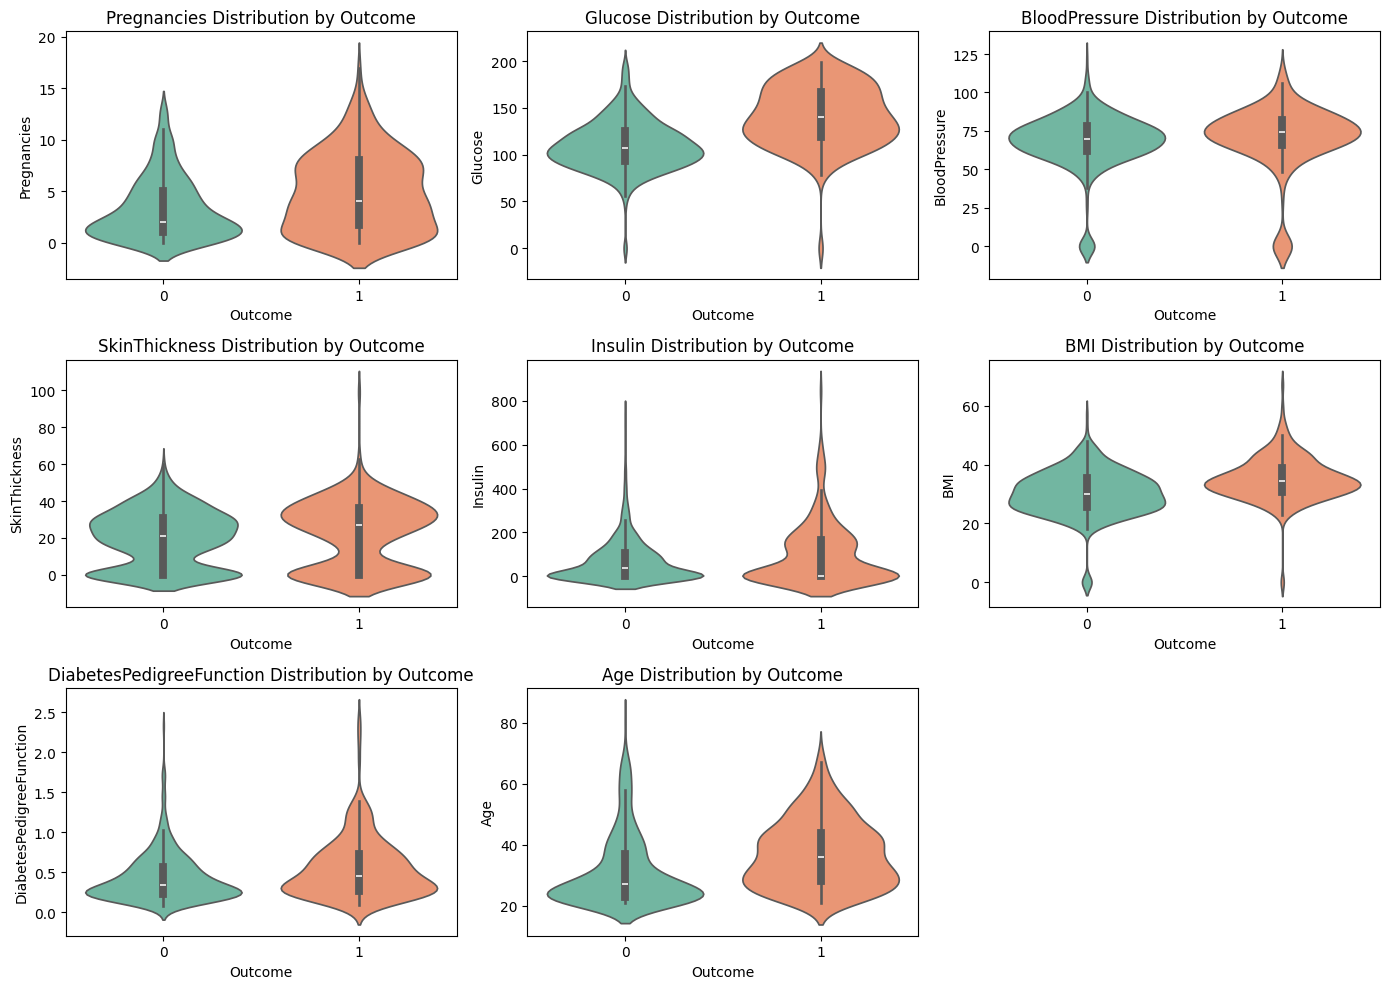

In [14]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.violinplot(data=df, x='Outcome', y=column, palette='Set2')
    plt.title(f'{column} Distribution by Outcome')
plt.tight_layout()
plt.savefig("violin.png")
plt.show()


**7. Age Distribution by Diabetes Status:**

Focusing on how age varies with diabetes.

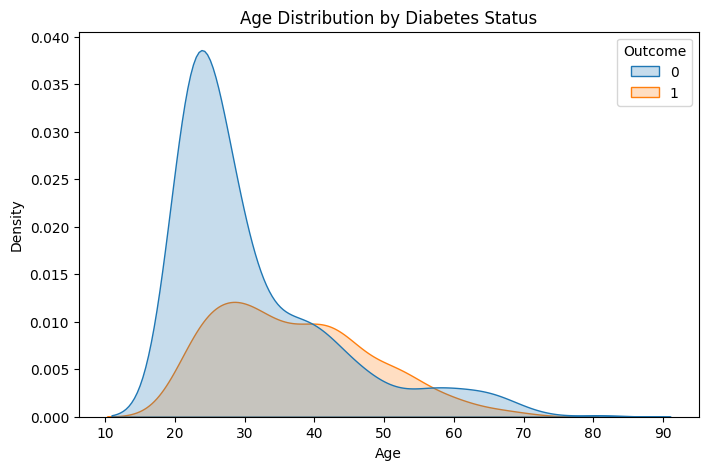

In [15]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='Age', hue='Outcome', fill=True)
plt.title('Age Distribution by Diabetes Status')
plt.xlabel('Age')
plt.savefig("age_diabetes.png")
plt.show()


### Data Preprocessing

In [16]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=0)

### Modeling - Logistic Regression

In [19]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [20]:
y_pred = model.predict(x_test)

### Evaluation - Logistic Regression

In [21]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")

Accuracy: 87.01%
Recall: 87.01%
Precision: 86.97%
F1 Score: 86.72%


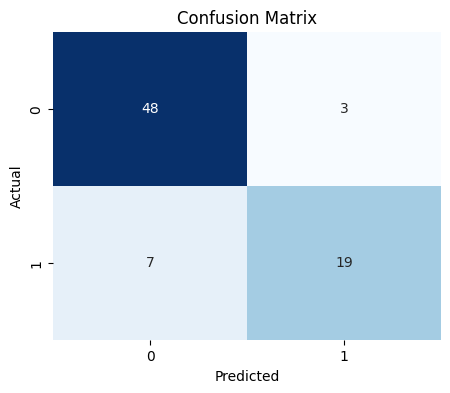

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("log_reg_conf_mat.png")
plt.show()

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91        51
           1       0.86      0.73      0.79        26

    accuracy                           0.87        77
   macro avg       0.87      0.84      0.85        77
weighted avg       0.87      0.87      0.87        77



### Modeling - Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

Decision Tree Accuracy: 0.7532467532467533


### Evaluation - Decision Tree

In [25]:
accuracy = accuracy_score(y_test, dt_pred)
recall = recall_score(y_test, dt_pred, average='weighted')
precision = precision_score(y_test, dt_pred, average='weighted')
f1 = f1_score(y_test, dt_pred, average='weighted')

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")

Accuracy: 75.32%
Recall: 75.32%
Precision: 76.85%
F1 Score: 75.77%


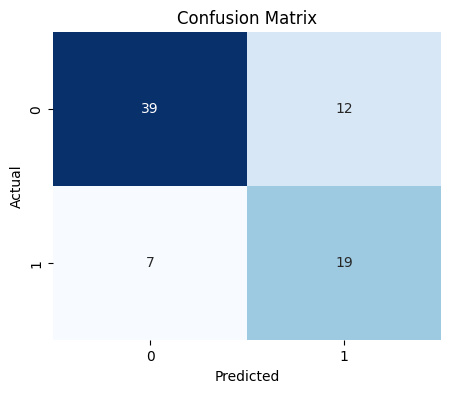

In [26]:
cm = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("dt_conf_mat.png")
plt.show()

### Modeling - Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Accuracy: 0.8051948051948052


### Evaluation - Random Forest

In [28]:
accuracy = accuracy_score(y_test, rf_pred)
recall = recall_score(y_test, rf_pred, average='weighted')
precision = precision_score(y_test, rf_pred, average='weighted')
f1 = f1_score(y_test, rf_pred, average='weighted')

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")

Accuracy: 80.52%
Recall: 80.52%
Precision: 80.36%
F1 Score: 80.42%


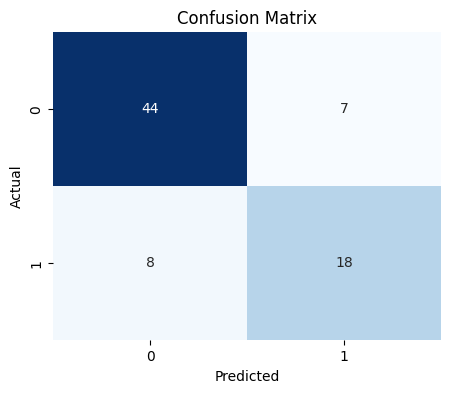

In [29]:
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("rf_conf_mat.png")
plt.show()

### Modeling - Support Vector Machine

In [38]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

SVM Accuracy: 0.8311688311688312


### Evaluation - Support Vector Machine

In [39]:
accuracy = accuracy_score(y_test, svm_pred)
recall = recall_score(y_test, svm_pred, average='weighted')
precision = precision_score(y_test, svm_pred, average='weighted')
f1 = f1_score(y_test, svm_pred, average='weighted')

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")

Accuracy: 83.12%
Recall: 83.12%
Precision: 82.85%
F1 Score: 82.84%


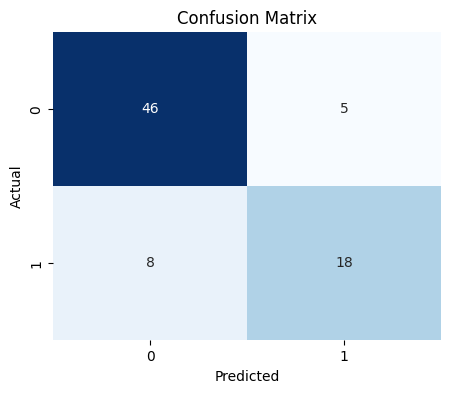

In [40]:
cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Modeling - K-Nearest Neighbour

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))

KNN Accuracy: 0.7792207792207793


### Evaluation - K-Nearest Neighbour

In [42]:
accuracy = accuracy_score(y_test, knn_pred)
recall = recall_score(y_test, knn_pred, average='weighted')
precision = precision_score(y_test, knn_pred, average='weighted')
f1 = f1_score(y_test, knn_pred, average='weighted')

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")

Accuracy: 77.92%
Recall: 77.92%
Precision: 77.46%
F1 Score: 77.56%


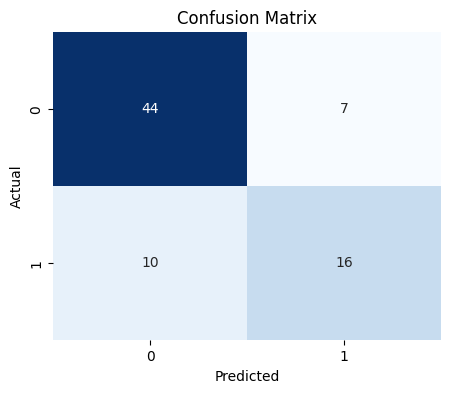

In [43]:
cm = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### ROC-AUC for all the models

### Exporting Model

In [19]:
import joblib
joblib.dump(model, "log_reg_diabetes_model.pkl")

['log_reg_diabetes_model.pkl']